In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import nltk
import re

#Описание задачи
Данный датасет представляет собой информацию о кланах в игре Clash of Clans 2023 года. Необходимо по имеющимся признакам определить среднее колличество игровых трофеев участников клана.

#Чтение данных

In [ ]:
df = pd.read_csv("coc_clans_dataset.csv")

Размеры таблицы (кол-во строк и столбцов)

In [ ]:
df.shape


(2736054, 27)

In [ ]:
df = df[:1500000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   clan_tag                        1500000 non-null  object 
 1   clan_name                       1499983 non-null  object 
 2   clan_type                       1500000 non-null  object 
 3   clan_description                930759 non-null   object 
 4   clan_location                   888997 non-null   object 
 5   isFamilyFriendly                1500000 non-null  bool   
 6   clan_badge_url                  1500000 non-null  object 
 7   clan_level                      1500000 non-null  float64
 8   clan_points                     1500000 non-null  float64
 9   clan_builder_base_points        1500000 non-null  float64
 10  clan_versus_points              1500000 non-null  float64
 11  required_trophies               1500000 non-null  float64
 12  

Столбцы:
* clan_tag - уникальный идентификатор тега для каждого клана
* clan_name - имя клана
* clan_type - тип клана (открытый, закрытый, другое)
* clan_description - описание клана
* clan_location - местонахождение клана
* isFamilyFriendly - семейный клан или нет
* clan_badge_url - изображение значка
* clan_level - уровень клана
* clan_points - общее количество очков, набранных кланом
* clan_builder_base_points - указывает на очки базы
* clan_versus_points - очки клана в версус моде
* required_trophies - минимальные необходимые трофеи для вступления
* war_frequency - частота клановых войн
* war_win_streak - побед в клановых войнах подряд
* war_wins - побед в клановых войнах
* war_ties - колличество клановых связей в войне
* war_losses - общее колличество потерь в клановой войне
* clan_war_league - лига в клановой войне
* num_members - кол-во участников в клане
* required_builder_base_trophies - минимальное кол-во трофеев строителя для вступления в клан
* required_versus_trophies - минимальное кол-во рейтинга в pvp для вступления в клан
* required_townhall_level - минимальный уровень главной постройки (тх) для вступления в клан
* clan_capital_hall_level  - уровень зала клановой столицы
* clan_capital_points - очки кланового капитала
* capital_league - лига столицы клана
* mean_member_level - средний уровень игроков клана
* mean_member_trophies - средние игровые трофеи участников клана

In [ ]:
df

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6.0,6887.0,5213.0,...,Unranked,11.0,1000.0,1000.0,1.0,1.0,0.0,Unranked,83.0,1254.0
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1.0,876.0,1019.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,90.0,1752.0
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1.0,732.0,670.0,...,Unranked,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,30.0,733.0
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2.0,1156.0,457.0,...,Bronze League I,2.0,0.0,0.0,1.0,1.0,0.0,Unranked,61.0,1156.0
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2.0,674.0,399.0,...,Unranked,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,23.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,#2YJYUQLG8,CyberSpace,open,"Active members, 500 dono for elder, would like...",Canada,True,https://api-assets.clashofclans.com/badges/200...,1.0,2539.0,3801.0,...,Unranked,6.0,0.0,0.0,5.0,0.0,0.0,Unranked,48.0,847.0
1499996,#CG9CR22L,Rompe Hoyos,open,Clan hecho para romper hoyos... Cofre del clan...,Argentina,True,https://api-assets.clashofclans.com/badges/200...,1.0,405.0,56.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,51.0,811.0
1499997,#RRCR92GQ,HUZUR,inviteOnly,NaN,Türkiye,True,https://api-assets.clashofclans.com/badges/200...,1.0,3080.0,2654.0,...,Unranked,6.0,0.0,0.0,1.0,0.0,0.0,Unranked,46.0,1027.0
1499998,#2YVVJPYJQ,Zona Dag 2021,open,mejor grupo,NaN,True,https://api-assets.clashofclans.com/badges/200...,1.0,141.0,39.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,12.0,283.0


Первые 10 строк

In [ ]:
df.head(10)

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6.0,6887.0,5213.0,...,Unranked,11.0,1000.0,1000.0,1.0,1.0,0.0,Unranked,83.0,1254.0
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1.0,876.0,1019.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,90.0,1752.0
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1.0,732.0,670.0,...,Unranked,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,30.0,733.0
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2.0,1156.0,457.0,...,Bronze League I,2.0,0.0,0.0,1.0,1.0,0.0,Unranked,61.0,1156.0
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2.0,674.0,399.0,...,Unranked,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,23.0,674.0
5,#282RGR09C,1worey200,open,NaN,Pakistan,True,https://api-assets.clashofclans.com/badges/200...,2.0,611.0,692.0,...,Bronze League II,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,22.0,611.0
6,#2G88QRQV2,leuke vrouwen,open,hoi,NaN,True,https://api-assets.clashofclans.com/badges/200...,1.0,383.0,309.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,28.0,766.0
7,#2Y9Q9GJP9,gryffindor,open,gelirseniz büyüyebiliriz.,Türkiye,True,https://api-assets.clashofclans.com/badges/200...,1.0,479.0,138.0,...,Unranked,2.0,0.0,0.0,1.0,0.0,0.0,Unranked,15.0,479.0
8,#2QY9RV8GR,DBlocks,inviteOnly,we them boys,Bahamas,True,https://api-assets.clashofclans.com/badges/200...,1.0,1028.0,1270.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,141.0,2056.0
9,#8PC0L2CG,GSA FAMILLY,open,NaN,International,True,https://api-assets.clashofclans.com/badges/200...,1.0,289.0,0.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,14.0,578.0


Последние строки

In [ ]:
df.tail()

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
1499995,#2YJYUQLG8,CyberSpace,open,"Active members, 500 dono for elder, would like...",Canada,True,https://api-assets.clashofclans.com/badges/200...,1.0,2539.0,3801.0,...,Unranked,6.0,0.0,0.0,5.0,0.0,0.0,Unranked,48.0,847.0
1499996,#CG9CR22L,Rompe Hoyos,open,Clan hecho para romper hoyos... Cofre del clan...,Argentina,True,https://api-assets.clashofclans.com/badges/200...,1.0,405.0,56.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,51.0,811.0
1499997,#RRCR92GQ,HUZUR,inviteOnly,NaN,Türkiye,True,https://api-assets.clashofclans.com/badges/200...,1.0,3080.0,2654.0,...,Unranked,6.0,0.0,0.0,1.0,0.0,0.0,Unranked,46.0,1027.0
1499998,#2YVVJPYJQ,Zona Dag 2021,open,mejor grupo,NaN,True,https://api-assets.clashofclans.com/badges/200...,1.0,141.0,39.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,12.0,283.0
1499999,#29UJ0UU28,X-star Elite,open,NaN,NaN,True,https://api-assets.clashofclans.com/badges/200...,1.0,161.0,25.0,...,Unranked,1.0,0.0,0.0,1.0,0.0,0.0,Unranked,12.0,323.0


Столбцы    clan_descript, 4   clan_loca, war_frequency, clan_war_league, capital_leaguetion  содержат категориальные значения. Заменим тип `'Object`' на специальный, предназначенный для хранения категориальных значений.

In [ ]:
df['clan_description'] = df['clan_description'].astype('category')
df['clan_location'] = df['clan_location'].astype('category')
df['war_frequency'] = df['war_frequency'].astype('category')
df['clan_war_league'] = df['clan_war_league'].astype('category')
df['capital_league'] = df['capital_league'].astype('category')

Информация о числовых признаках

In [ ]:
df.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,mean_member_level,mean_member_trophies
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,2.350920e+00,2.576043e+03,2.563133e+03,2.563133e+03,3.760536e+02,2.078553e-01,1.750626e+01,2.152080e-01,9.978829e+00,4.755373e+00,2.308168e+02,2.308168e+02,2.193740e+00,5.650227e-01,6.872323e+01,4.884979e+01,8.968700e+02
std,3.298806e+00,5.864975e+03,5.867534e+03,5.867534e+03,8.335616e+02,9.733893e-01,6.046107e+01,1.372521e+00,3.705833e+01,8.282119e+00,7.364990e+02,7.364990e+02,2.731992e+00,1.607481e+00,3.662487e+02,3.872080e+01,5.879548e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.520000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,4.940000e+02
50%,1.000000e+00,6.920000e+02,6.470000e+02,6.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,7.900000e+02
75%,2.000000e+00,1.798000e+03,1.865000e+03,1.865000e+03,4.000000e+02,0.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01,1.155000e+03
max,3.600000e+01,5.472100e+04,5.168600e+04,5.168600e+04,6.500000e+04,1.720000e+02,1.323000e+03,3.190000e+02,1.220000e+03,5.000000e+01,5.500000e+03,5.500000e+03,1.500000e+01,1.000000e+01,5.692000e+03,3.050000e+02,5.466000e+03


Информация о категориальных признаках

In [ ]:
df.describe(include=['category'])

,clan_description,clan_location,war_frequency,clan_war_league,capital_league
count,930759,888997,1500000,1500000,1500000
unique,847791,255,6,19,23
top,hi,International,unknown,Unranked,Unranked
freq,1308,213256,720933,1277980,1426527


#Обработка пропущенных сзначений

Посмотрим таблицу пропущенных значений

In [ ]:
df.isnull()

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1499996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1499997,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1499998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Просуммируем их и посмотрим где они присутствуют

In [ ]:
df.isnull().sum()

clan_tag                               0
clan_name                             17
clan_type                              0
clan_description                  569241
clan_location                     611003
isFamilyFriendly                       0
clan_badge_url                         0
clan_level                             0
clan_points                            0
clan_builder_base_points               0
clan_versus_points                     0
required_trophies                      0
war_frequency                          0
war_win_streak                         0
war_wins                               0
war_ties                               0
war_losses                             0
clan_war_league                        0
num_members                            0
required_builder_base_trophies         0
required_versus_trophies               0
required_townhall_level                0
clan_capital_hall_level                0
clan_capital_points                    0
capital_league  

Строки с пропущенными значениями

In [ ]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['clan_name', 'clan_description', 'clan_location']

Строки с пропущенными значениями можно исключить

In [ ]:
df = df.dropna()

Удалим столбцы, которые не влияют на результат

In [ ]:
df = df.drop("clan_tag", axis = 1)

In [ ]:
df = df.drop("clan_name", axis = 1)

In [ ]:
df = df.drop("clan_badge_url", axis = 1)

In [ ]:
df = df.drop("clan_description", axis = 1)

In [ ]:
df.isna().sum()

clan_type                         0
clan_location                     0
isFamilyFriendly                  0
clan_level                        0
clan_points                       0
clan_builder_base_points          0
clan_versus_points                0
required_trophies                 0
war_frequency                     0
war_win_streak                    0
war_wins                          0
war_ties                          0
war_losses                        0
clan_war_league                   0
num_members                       0
required_builder_base_trophies    0
required_versus_trophies          0
required_townhall_level           0
clan_capital_hall_level           0
clan_capital_points               0
capital_league                    0
mean_member_level                 0
mean_member_trophies              0
dtype: int64

#Визуализация данных

Средние игровые трофеи участников клана в первую очередь зависит от среднего уровня игроков в клане. Построим диаграмму рассеивания для двух признаков mean_member_level и mean_member_trophies.

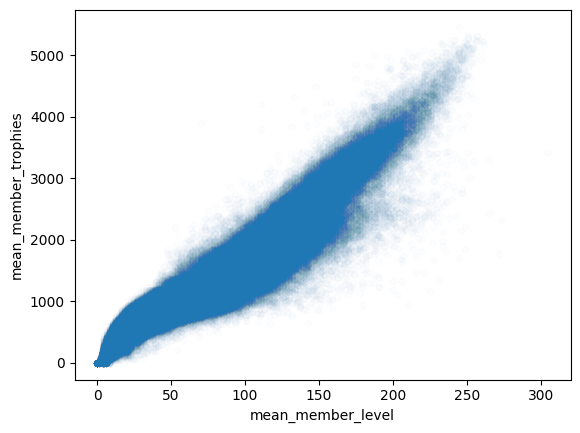

In [ ]:
df.plot(kind = "scatter",x = 'mean_member_level', y = 'mean_member_trophies', alpha = .01)
pass

Мы видим, что чем выше средний уровень игрока в клане, тем выше среднее колличество игровых трофеев игроков клана.

Посмотрим как влияет уровень клана и средние игровые трофеи

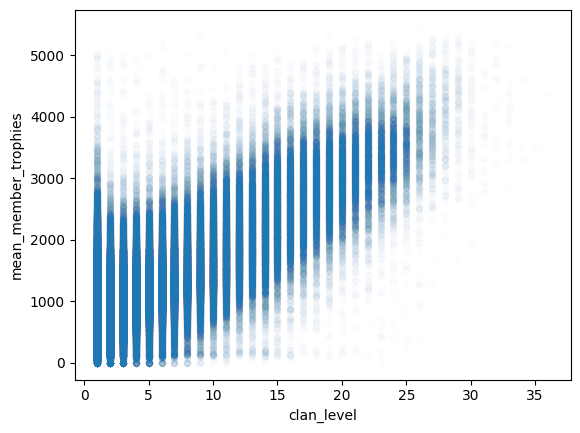

In [ ]:

df.plot(kind = "scatter",x = 'clan_level', y = 'mean_member_trophies', alpha = .01)
pass

Из диаграммы видно, что чем выше уровень клана, тем выше в среднем средние трофеи игроков клана, за исключением первого уровня.

По данным этого графика можно заметить, что больше всего кланов с средним уровнем трофеев игроков находятся в диапазоне от 100 до 1500 трофеев

Text(0.5, 1.0, 'average trophies')

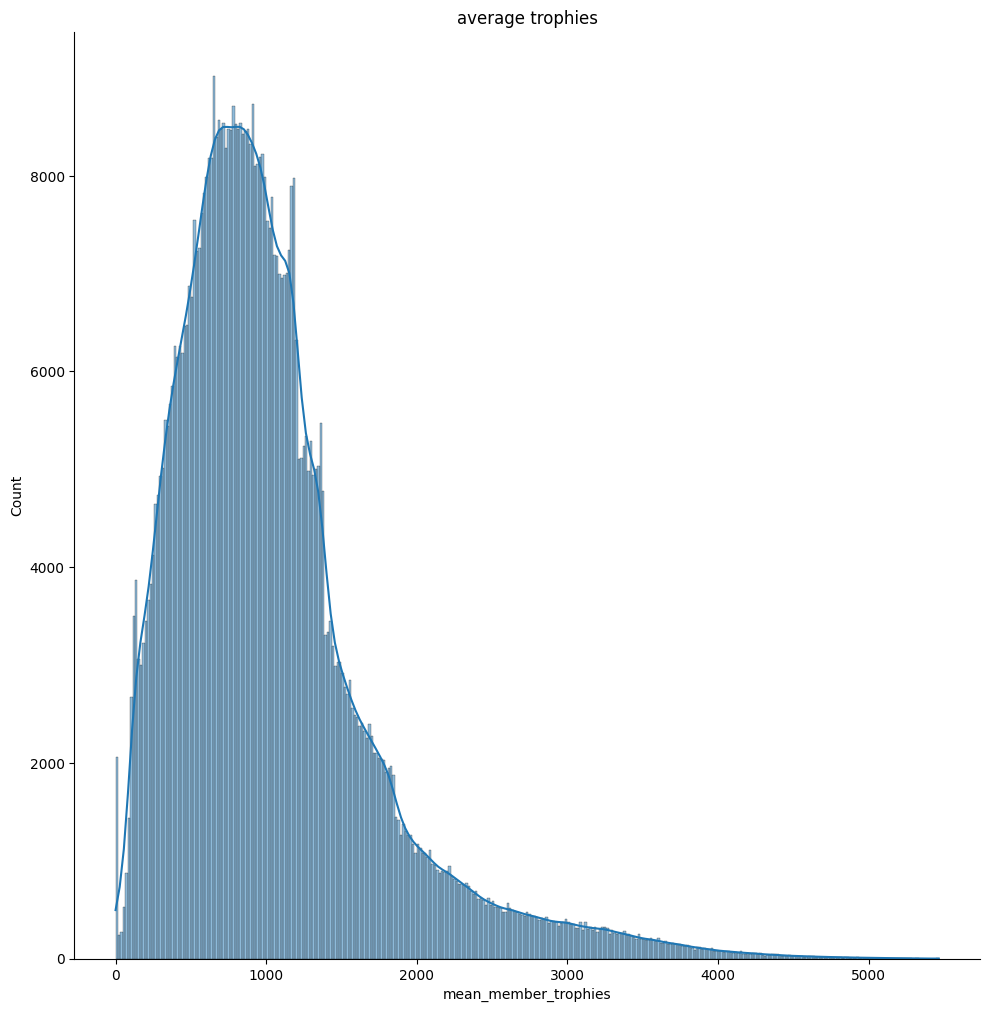

In [ ]:
sns.displot(data = df['mean_member_trophies'], kde=True, height = 10)
plt.title('average trophies')

Среднее

In [ ]:
df['mean_member_trophies'].mean()

1039.6708253430425

Разброс

In [ ]:
df['mean_member_trophies'].var()

456897.8355858557

#Выбросы

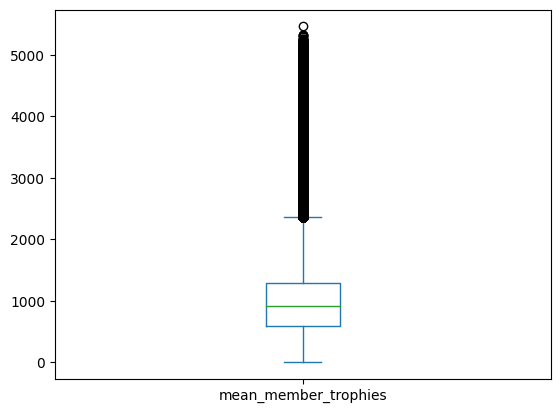

In [ ]:
df['mean_member_trophies'].plot(kind='box')
pass

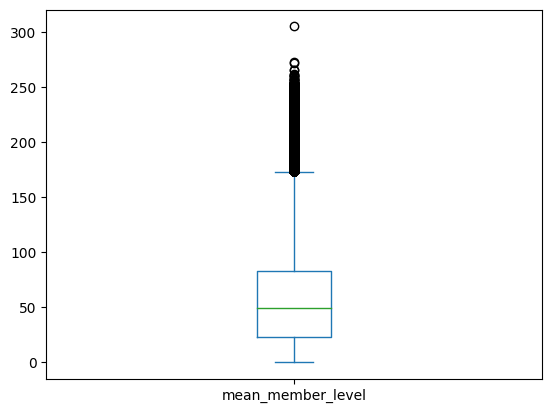

In [ ]:
df['mean_member_level'].plot(kind='box')
pass

In [ ]:
df['mean_member_trophies'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      70.0
0.010     105.0
0.050     233.0
0.100     346.0
0.500     911.0
0.900    1851.0
0.950    2388.0
0.990    3489.0
0.995    3814.0
Name: mean_member_trophies, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'mean_member_trophies'` находится в диапазоне от $70$ до $3814$ трофеев (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

удалим значения, которые выходят за пределы от $0.005$ и $0.995$

In [ ]:
data = df[
    (df['mean_member_trophies'] >= df['mean_member_trophies'].quantile(0.005)) & (df['mean_member_trophies'] <= df['mean_member_trophies'].quantile(0.995))&
    (df['mean_member_level']  >= df['mean_member_level' ].quantile(0.005)) & (df['mean_member_level']  <= df['mean_member_level' ].quantile(0.995))]
data.shape

(663098, 23)

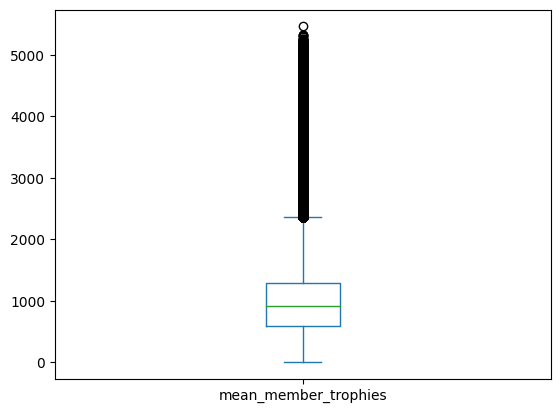

In [ ]:
df['mean_member_trophies'].plot(kind='box')
pass

мы видим, что медиана равна примерно 900 (большинство всех данных находитcя примерно 900-990)

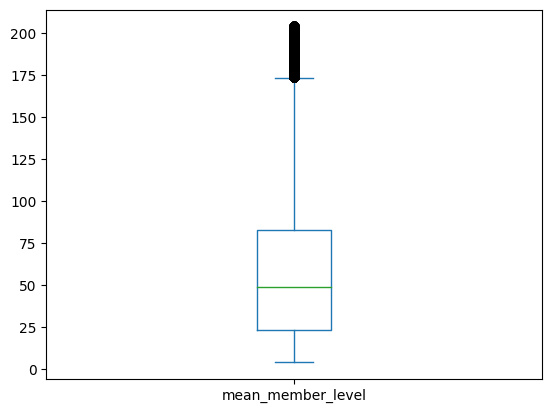

In [ ]:
data['mean_member_level'].plot(kind='box')
pass

Другой способ обнаружения выбросов. Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [ ]:
Q1, Q3 = df['mean_member_trophies'].quantile([.25, .75])
IQR = Q3 - Q1
price_lower = Q1 - 1.5*IQR
price_upper = Q3 + 1.5*IQR

In [ ]:
rows_to_drop = df[
    (df['mean_member_trophies'] < price_lower) | (df['mean_member_trophies'] > price_upper)].index
data = df.drop(rows_to_drop)
data.shape

(636329, 23)

In [ ]:
rows_to_drop = df[
    (df['mean_member_level'] < price_lower) | (df['mean_member_level'] > price_upper)].index
data = df.drop(rows_to_drop)
data.shape

(671127, 23)

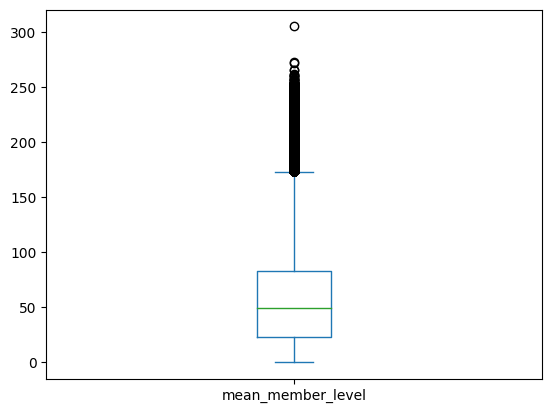

In [ ]:
data['mean_member_level'].plot(kind='box')
pass

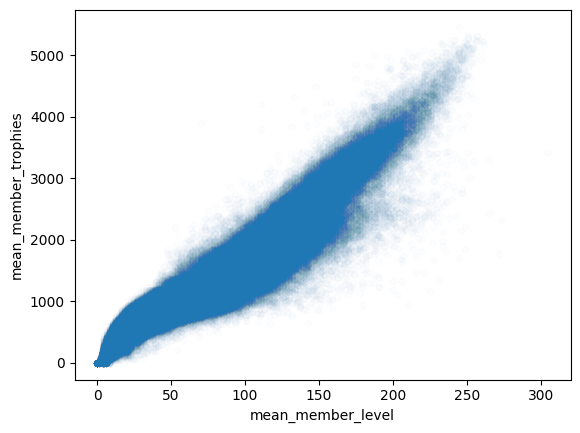

In [ ]:
df.plot(kind = "scatter",x = 'mean_member_level', y = 'mean_member_trophies', alpha = .01)
pass

Кореляционная матрица

In [ ]:
cor_mat = df.corr(numeric_only = True)
cor_mat

,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,mean_member_level,mean_member_trophies
isFamilyFriendly,1.000000,0.037286,0.068498,0.070333,0.070333,0.007939,0.015455,0.021014,0.008382,0.023249,0.081073,0.006949,0.006949,0.062422,0.072460,0.057687,0.037205,0.046476
clan_level,0.037286,1.000000,0.823057,0.817226,0.817226,0.377235,0.209717,0.900172,0.278975,0.589682,0.723284,0.258307,0.258307,0.577365,0.824167,0.717093,0.711886,0.747039
clan_points,0.068498,0.823057,1.000000,0.988338,0.988338,0.337667,0.220644,0.672098,0.160753,0.441780,0.928188,0.231266,0.231266,0.644273,0.920696,0.875151,0.695474,0.801449
clan_builder_base_points,0.070333,0.817226,0.988338,1.000000,1.000000,0.328909,0.212883,0.661751,0.160028,0.444026,0.932932,0.233433,0.233433,0.644821,0.919909,0.847333,0.703795,0.794818
clan_versus_points,0.070333,0.817226,0.988338,1.000000,1.000000,0.328909,0.212883,0.661751,0.160028,0.444026,0.932932,0.233433,0.233433,0.644821,0.919909,0.847333,0.703795,0.794818
required_trophies,0.007939,0.377235,0.337667,0.328909,0.328909,1.000000,0.073888,0.317936,0.083004,0.213562,0.258824,0.692179,0.692179,0.444787,0.309066,0.287131,0.357684,0.380656
war_win_streak,0.015455,0.209717,0.220644,0.212883,0.212883,0.073888,1.000000,0.187338,0.070449,0.062411,0.218818,0.051910,0.051910,0.162988,0.226206,0.212555,0.158326,0.176149
war_wins,0.021014,0.900172,0.672098,0.661751,0.661751,0.317936,0.187338,1.000000,0.314868,0.570899,0.565678,0.221923,0.221923,0.460376,0.655559,0.600280,0.596160,0.613820
war_ties,0.008382,0.278975,0.160753,0.160028,0.160028,0.083004,0.070449,0.314868,1.000000,0.392209,0.155367,0.047462,0.047462,0.106991,0.169770,0.121467,0.182608,0.160368
war_losses,0.023249,0.589682,0.441780,0.444026,0.444026,0.213562,0.062411,0.570899,0.392209,1.000000,0.394143,0.156455,0.156455,0.298703,0.435579,0.353115,0.399816,0.409734


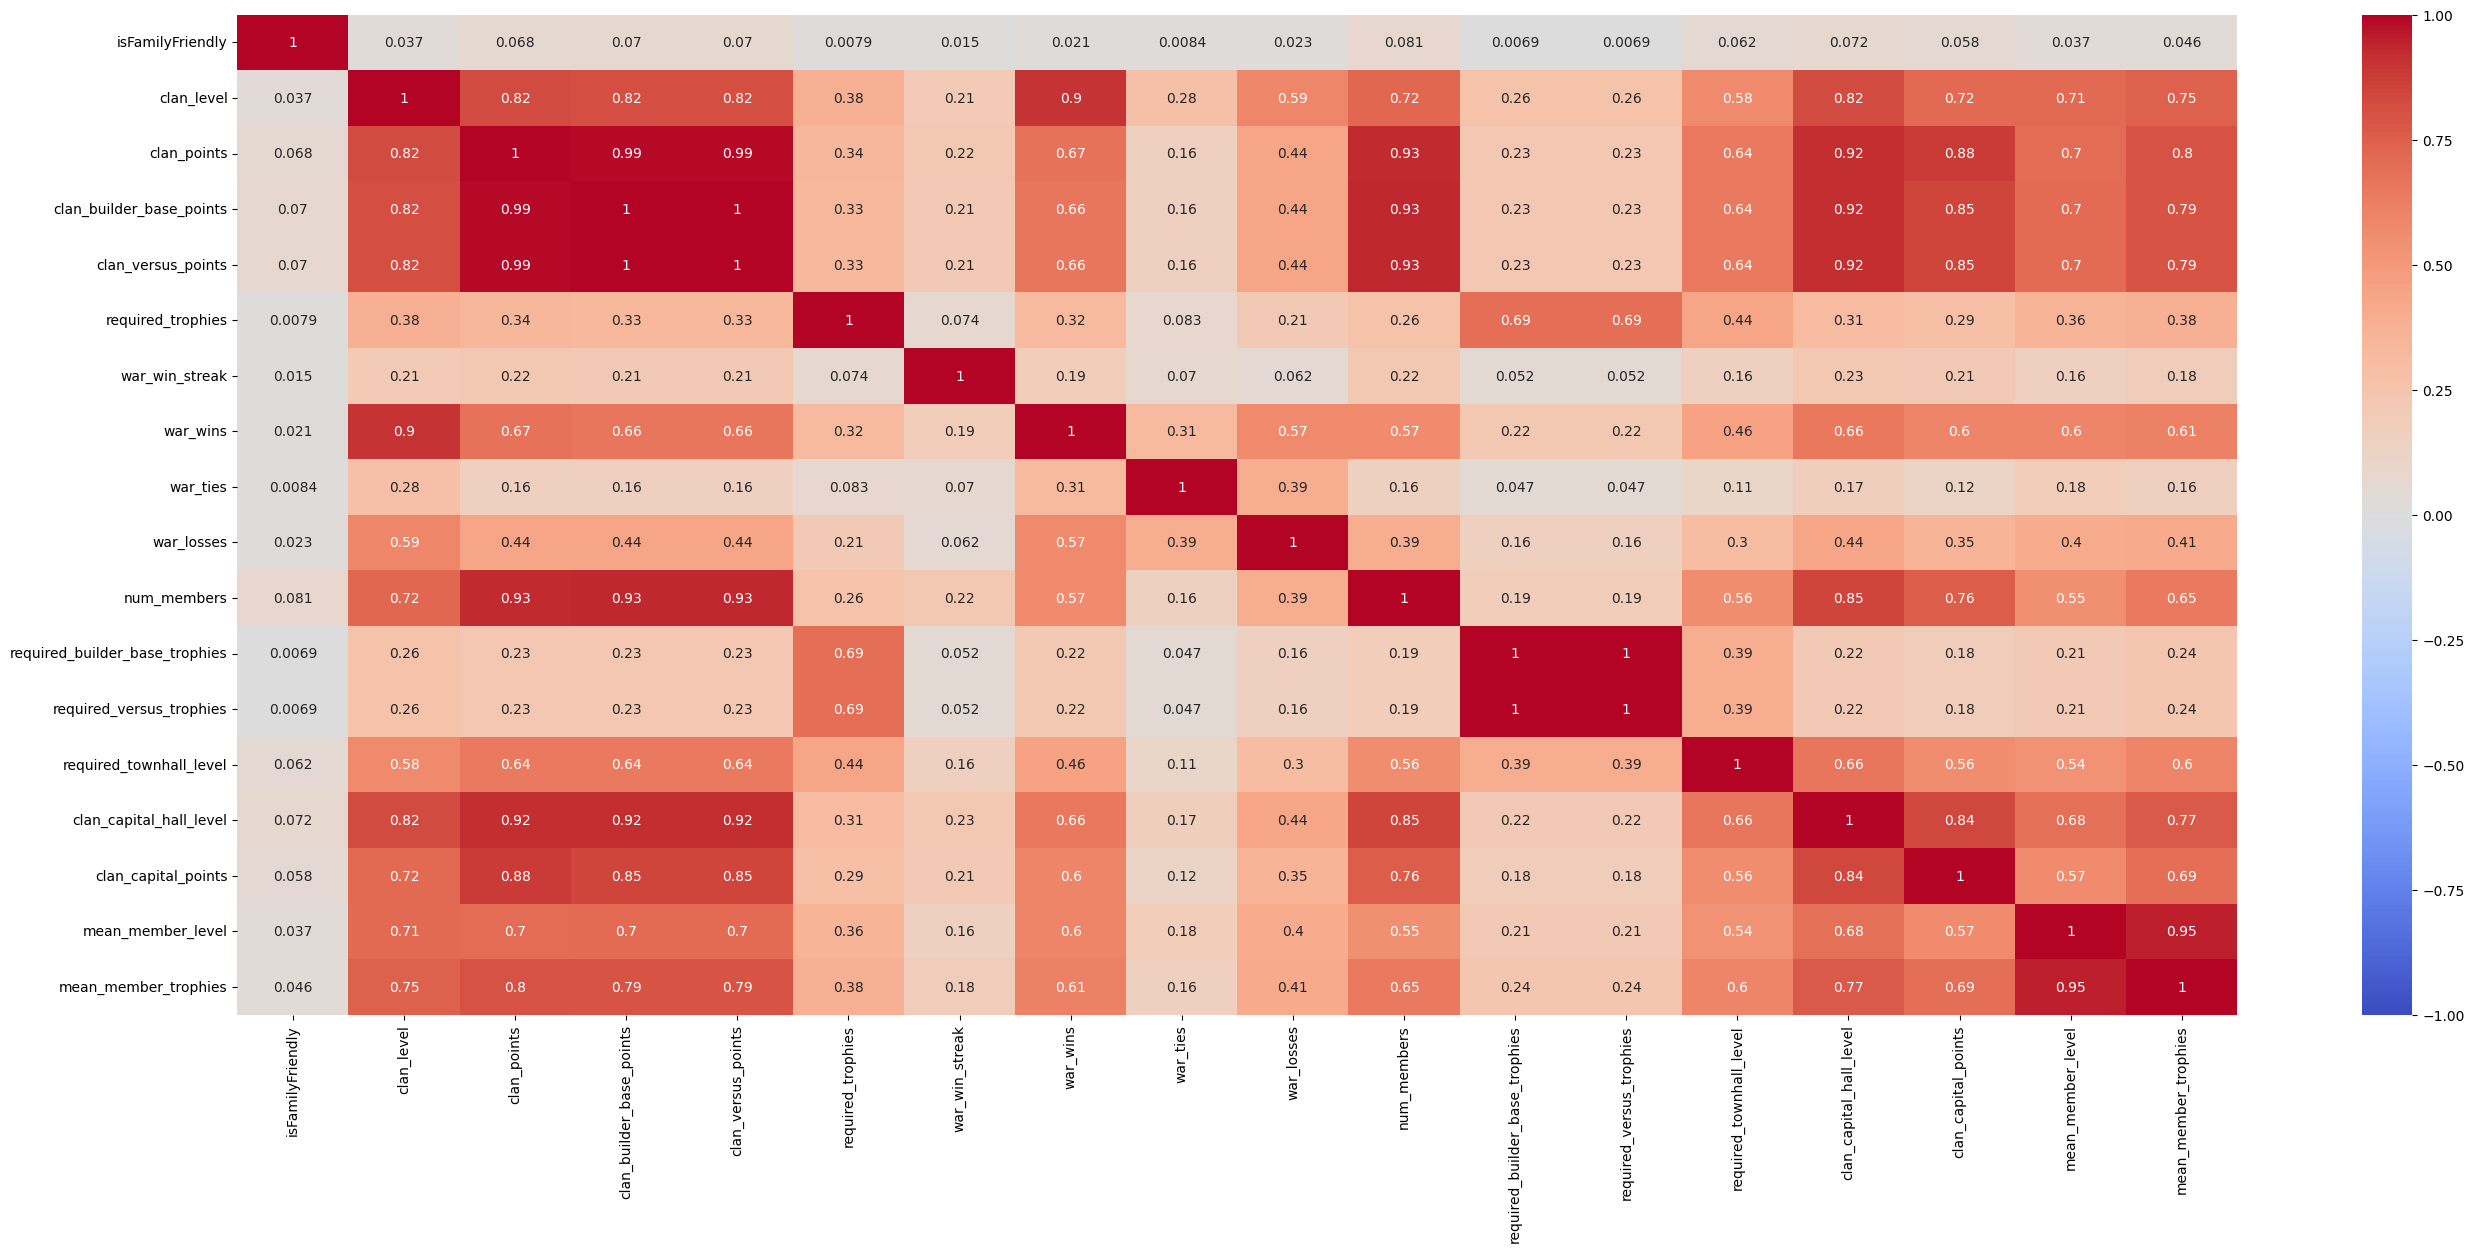

In [ ]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(cor_mat, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

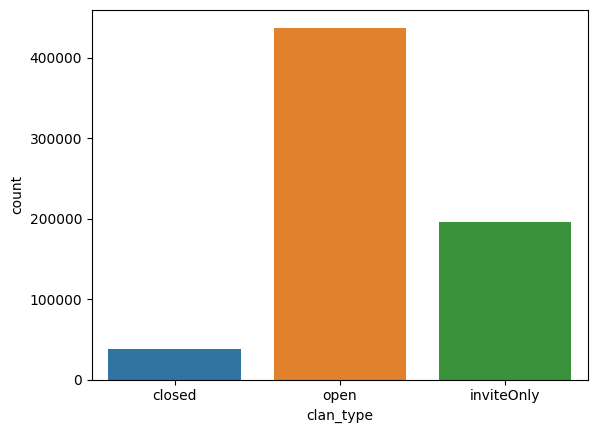

In [ ]:
sns.countplot(x='clan_type', data=data)
pass

# Обучающая и тестовая выборка

Для предсказанияпримерного среднего колличества игровых трофеев участников клана, будем использовать все оставшиеся признаки

In [ ]:
X = df.drop(['mean_member_trophies'], axis=1)
y = df['mean_member_trophies']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(503345, 167782)

Бинаризация числовых признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [ ]:
dummies = pd.DataFrame(enc.transform(X_train[['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,clan_type_closed,clan_type_inviteOnly,clan_type_open,clan_location_Afghanistan,clan_location_Albania,clan_location_Algeria,clan_location_American Samoa,clan_location_Andorra,clan_location_Angola,clan_location_Anguilla,...,capital_league_Master League I,capital_league_Master League II,capital_league_Master League III,capital_league_Silver League I,capital_league_Silver League II,capital_league_Silver League III,capital_league_Titan League I,capital_league_Titan League II,capital_league_Titan League III,capital_league_Unranked
1203598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
698541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
427818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1429264,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104027,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Добавим эти dummy-столбцы к таблице и удалим столбцы 'clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league':

In [ ]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league'], axis=1)

In [ ]:
X_train.head()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,...,capital_league_Master League I,capital_league_Master League II,capital_league_Master League III,capital_league_Silver League I,capital_league_Silver League II,capital_league_Silver League III,capital_league_Titan League I,capital_league_Titan League II,capital_league_Titan League III,capital_league_Unranked
1203598,2.0,1006.0,1941.0,1941.0,1200.0,0.0,9.0,1.0,16.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
698541,1.0,683.0,649.0,649.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
427818,1.0,544.0,25.0,25.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1429264,9.0,1901.0,1896.0,1896.0,0.0,0.0,112.0,1.0,58.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104027,2.0,311.0,111.0,111.0,600.0,0.0,9.0,0.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Масштабирование количественных признаков

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
X_train.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,...,capital_league_Master League I,capital_league_Master League II,capital_league_Master League III,capital_league_Silver League I,capital_league_Silver League II,capital_league_Silver League III,capital_league_Titan League I,capital_league_Titan League II,capital_league_Titan League III,capital_league_Unranked
count,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,...,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05,5.033450e+05
mean,5.787731e-17,-2.984210e-17,-4.867340e-17,-4.867340e-17,-3.444405e-18,2.766818e-18,-5.240014e-17,2.317915e-17,2.046174e-17,-1.129313e-18,...,3.139491e-17,5.364238e-19,-3.595451e-17,1.583862e-17,6.211223e-18,2.207807e-17,-5.985360e-18,-2.823283e-18,-9.803851e-18,-4.319623e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.929975e-01,-5.277408e-01,-5.327489e-01,-5.327489e-01,-5.977794e-01,-2.676146e-01,-4.154937e-01,-2.141403e-01,-3.646262e-01,-6.475459e-01,...,-4.304711e-02,-4.774901e-02,-5.421262e-02,-8.508791e-02,-8.648621e-02,-8.964785e-02,-1.423676e-02,-1.948347e-02,-2.363423e-02,-3.079035e+00
25%,-5.929975e-01,-4.717771e-01,-5.105982e-01,-5.105982e-01,-5.977794e-01,-2.676146e-01,-4.154937e-01,-2.141403e-01,-3.646262e-01,-5.560858e-01,...,-4.304711e-02,-4.774901e-02,-5.421262e-02,-8.508791e-02,-8.648621e-02,-8.964785e-02,-1.423676e-02,-1.948347e-02,-2.363423e-02,3.247770e-01
50%,-3.664150e-01,-3.958352e-01,-4.103571e-01,-4.103571e-01,-5.977794e-01,-2.676146e-01,-3.680820e-01,-2.141403e-01,-3.453574e-01,-3.731656e-01,...,-4.304711e-02,-4.774901e-02,-5.421262e-02,-8.508791e-02,-8.648621e-02,-8.964785e-02,-1.423676e-02,-1.948347e-02,-2.363423e-02,3.247770e-01
75%,8.674998e-02,-9.789976e-02,-8.059997e-02,-8.059997e-02,4.348039e-01,-2.676146e-01,-1.310235e-01,-2.141403e-01,-1.334000e-01,-7.325239e-03,...,-4.304711e-02,-4.774901e-02,-5.421262e-02,-8.508791e-02,-8.648621e-02,-8.964785e-02,-1.423676e-02,-1.948347e-02,-2.363423e-02,3.247770e-01
max,7.110807e+00,6.262483e+00,5.925484e+00,5.925484e+00,6.652013e+01,1.238621e+02,1.412805e+01,1.718799e+02,2.314337e+01,3.925459e+00,...,2.323036e+01,2.094284e+01,1.844589e+01,1.175255e+01,1.156254e+01,1.115476e+01,7.024069e+01,5.132557e+01,4.231150e+01,3.247770e-01


Обучаем модель

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = model.predict(X_train)

In [ ]:
model.coef_

array([-3.77887871e+01,  5.36345316e+02, -9.85785668e+12,  9.85785668e+12,
        4.06267597e+00, -1.10077457e+00, -1.96655005e+01, -6.25320888e+00,
        5.50885085e+00, -1.50149182e+02,  1.43445126e+13, -1.43445126e+13,
        8.05396045e+00,  6.41838721e+00,  6.19184108e+01,  5.10186975e+02,
        4.24341184e+12,  8.28629414e+12,  8.69153255e+12,  5.40549346e+12,
        3.49273707e+12,  3.34275228e+12,  3.30947846e+12,  2.83474770e+12,
        2.31965292e+12,  1.93315134e+12,  2.46502319e+12,  1.38880926e+12,
        4.38241297e+12,  1.41000248e+12,  1.48927429e+12,  1.17158598e+12,
        5.95253883e+12,  3.07596587e+12,  3.69176671e+12,  1.26003518e+12,
        1.14598356e+12,  7.56054987e+12,  1.09636644e+12,  1.69197987e+12,
        4.02842098e+12,  9.82163323e+11,  9.93428378e+11,  1.30626953e+12,
        1.39147611e+12,  2.99074803e+12,  1.50905417e+12,  8.21768634e+11,
        7.15587758e+11,  1.13688282e+13,  1.30626953e+12,  1.25117572e+12,
        1.33712698e+12,  

In [ ]:
y_train

1203598     671.0
698541      684.0
427818      544.0
1429264     761.0
104027      623.0
            ...  
1192122     495.0
235400       88.0
1380905     403.0
990761     1822.0
770972     2480.0
Name: mean_member_trophies, Length: 503345, dtype: float64

In [ ]:
y_train_predict

array([ 587.53645246,  612.90363996,  700.21125715, ...,  458.1057884 ,
       2085.02278059, 2660.67903059])

In [ ]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(21660.36586653879, 147.1746101287134)

Тестируем модель

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_test[['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league']])
# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['clan_type','clan_location','isFamilyFriendly','war_frequency','clan_war_league','capital_league'], axis=1)

# Масштабирование:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test.info(verbose=True)
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167782 entries, 1033226 to 1395398
Data columns (total 323 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    clan_level                                    float64
 1    clan_points                                   float64
 2    clan_builder_base_points                      float64
 3    clan_versus_points                            float64
 4    required_trophies                             float64
 5    war_win_streak                                float64
 6    war_wins                                      float64
 7    war_ties                                      float64
 8    war_losses                                    float64
 9    num_members                                   float64
 10   required_builder_base_trophies                float64
 11   required_versus_trophies                      float64
 12   required_townhall_level            

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

Измеряем метрики качества

In [ ]:
print(y_train.shape, y_test.shape)

(503345,) (167782,)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(21660.36586653879,
 1.9768657104250738e+24,
 0.9525826212989934,
 -4.324025639050102e+18)

In [ ]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

0.9525826212989934

In [ ]:
model.score(X_test, y_test)

-4.324025639050102e+18

In [ ]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(21660.36586653879, 1.9768657104250738e+24)

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(147.1746101287134, 1406010565545.321)

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [ ]:
RMSE_table

,train,test
"Linear Regression, all features",147.17461,1406010565545.321045


In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.952583,-4324025639050101760.0


# Предскажем среднее кол-во трофеев участников клана по колличеству участников клана

Попробуем построить линейную модель, описывающую зависимость `mean_member_trophies` только от `num_members`

In [ ]:
model = LinearRegression()
model.fit(X_train[['num_members']], y_train)

y_train_predict = model.predict(X_train[['num_members']])
y_test_predict  = model.predict(X_test[['num_members']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, num_members', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",147.17461,1406010565545.321045
"Linear Regression, num_members",516.086804,517.659698


In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, num_members', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.952583,-4324025639050101760.0
"Linear Regression, num_members",0.416935,0.413862


# Как зависит среднее кол-во трофеев участников клана от уровня клана
Попробуем построить линейную модель, описывающую зависимость `mean_member_trophies` только от `clan_level`

In [ ]:
model = LinearRegression()
model.fit(X_train[['clan_level']], y_train)

y_train_predict = model.predict(X_train[['clan_level']])
y_test_predict  = model.predict(X_test[['clan_level']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, clan_level', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",147.17461,1406010565545.321045
"Linear Regression, num_members",516.086804,517.659698
"Linear Regression, clan_level",449.362373,449.324043


In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, clan_level', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.952583,-4324025639050101760.0
"Linear Regression, num_members",0.416935,0.413862
"Linear Regression, clan_level",0.557956,0.558399


# Метод k-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['k Nearest Neighbours = 3', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",147.17461,1406010565545.321045
"Linear Regression, num_members",516.086804,517.659698
"Linear Regression, clan_level",449.362373,449.324043
k Nearest Neighbours = 3,184.387132,266.394558


In [ ]:
R2_table.loc['k Nearest Neighbours = 3', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.952583,-4324025639050101760.0
"Linear Regression, num_members",0.416935,0.413862
"Linear Regression, clan_level",0.557956,0.558399
k Nearest Neighbours = 3,0.925573,0.844775


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['k Nearest Neighbours k = 5', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",147.17461,1406010565545.321045
"Linear Regression, num_members",516.086804,517.659698
"Linear Regression, clan_level",449.362373,449.324043
k Nearest Neighbours = 3,184.387132,266.394558
k Nearest Neighbours k = 5,210.276588,261.101951


In [ ]:
R2_table.loc['k Nearest Neighbours k = 5', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.952583,-4324025639050101760.0
"Linear Regression, num_members",0.416935,0.413862
"Linear Regression, clan_level",0.557956,0.558399
k Nearest Neighbours = 3,0.925573,0.844775
k Nearest Neighbours k = 5,0.903205,0.850882


Метод ближайших соседей при кол-во соседей = 5 показал лучший результат